In [1]:
pd.options.display.max_rows = 9999
pd.options.display.max_columns = 9999

import sys
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from PIL import Image
from functools import reduce

%matplotlib inline
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import requests

In [3]:
#parameter

code, page_size, page = "KOSPI", 20, 1

url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code={}&pageSize={}&page={}".format(code, page_size, page)
url

'https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSPI&pageSize=20&page=1'

In [4]:
response = requests.get(url)
response

<Response [200]>

In [5]:
#json(str) -> dict(parsing) : df

datas = response.json()['result']['siseList']
kospi_df = pd.DataFrame(datas)
kospi_df.tail()

,cd,dt,ncv,cv,cr,ov,hv,lv
15,KOSPI,20200605,2181.87,30.69,1.43,2151.17,2187.25,2138.18
16,KOSPI,20200604,2151.18,4.18,0.19,2181.64,2191.00,2139.68
17,KOSPI,20200603,2147.00,59.81,2.87,2108.55,2156.55,2107.69
18,KOSPI,20200602,2087.19,22.11,1.07,2061.45,2089.43,2059.14
19,KOSPI,20200601,2065.08,35.48,1.75,2037.04,2065.38,2035.63


In [6]:
def get_stock_data(code="KOSPI", page_size=20, page=1):
    url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code={}&pageSize={}&page={}".format(code, page_size, page)
    response = requests.get(url)
    return pd.DataFrame(response.json()['result']['siseList'])

In [7]:
kospi_df = get_stock_data(page_size=100)
kosdaq_df = get_stock_data("KOSDAQ",100)

In [8]:
kosdaq_df.head()

,cd,dt,ncv,cv,cr,ov,hv,lv
0,KOSDAQ,20200626,750.58,0.22,0.03,758.62,758.62,742.57
1,KOSDAQ,20200625,750.36,-9.14,-1.20,749.81,757.23,745.98
2,KOSDAQ,20200624,759.50,6.27,0.83,758.15,765.21,755.12
3,KOSDAQ,20200623,753.23,1.59,0.21,758.61,761.37,744.26
4,KOSDAQ,20200622,751.64,9.61,1.30,742.98,752.98,741.78


In [9]:
#1. URL

code, page_size, page = "FX_USDKRW", 100, 1
url = 'https://m.stock.naver.com/api/json/marketindex/marketIndexDay.nhn?marketIndexCd={}&pageSize={}&page={}'.format(code, page_size, page)


#2. req, rep : JSON
headers = {"cookie":"NRTK=ag#all_gr#1_ma#-2_si#0_en#0_sp#0; NNB=CMA7YWP7P2XF4; NaverSuggestUse=use%26unuse; _ga=GA1.2.773807485.1590195174; nx_ssl=2; ASID=6af24fe600000172b0e8cca30000004c; nid_inf=-1496171055; NID_AUT=a7ughWicWlJrQTgQ+CkwmRvaHq2c+nJiMy95GX28FJjCEWQSG4047DBrmGx+Zr2D; NID_JKL=Pho2PdQOZrILUyf3OTEukiPzNn5qauR7NiyKzzZH8uU=; NID_SES=AAABgZqF2SnQbopTDmPcdqJi8W1dMFUfKwJfpkciWTHO8Vr3kZOpSrL7G4o2BwfEk3JUOEBbcMVxmzfNCek4hsnTlHZlZevt5fEZP5JjiOX593U3l1dCBIW7Ma348+M5R+t43tMfUgMuXTjQ2q0vlCxjYu1F8egvoky8VMI9WbDPW5ysZaeB7fbombvBgzo8hyjAa4DFVmIzj2wNor9FAGRiu0+b4BSc7BDboNn50ZFSvoiiEAYKLFlSMm8FBUAPaJa2A7jFY1mI4irXlROPCvG9aOMm/AKIz+sAkJ/8RinVuLMyqMcLoq6vsJZTP+l5CDiunfQFArdCfrQ6ZlJkUXyv09FqkWsmGKteYaWjrIM6qXISoWhA3xex9OZx60+fb3tP8DAjQS0YPnsqFK2fDcFW3FNRNITrdANJFti+FUa0cl2pNkPJk3qOgUty5CiZQKWG7PgNLcWiAOukAljuthffph3jhuhfd1OXvuFfrnqU2NevcAiR4uo2BqABg02T8nT95WRCER6eiPIudknQCcFCEkM=; naver_mobile_stock_codeList=102280%7C; XSRF-TOKEN=0dd911ec-40af-4411-83e9-514bb9769403; JSESSIONID=E5FBDAD1347E6CEB95935D2807A127A4; BMR="}
response = requests.get(url, headers = headers)

response.text

#3. JSON > DF
datas = response.json()["result"]["marketIndexDay"]
usd_df = pd.DataFrame(datas)
usd_df.tail()

,dt,nv,cv,cr,cbv,csv,sv,rv
95,20200210,1187.0,-6.5,-0.54,1207.77,1166.23,1198.6,1175.4
96,20200207,1193.5,9.5,0.80,1214.38,1172.62,1205.1,1181.9
97,20200206,1184.0,-0.5,-0.04,1204.72,1163.28,1195.6,1172.4
98,20200205,1184.5,-4.0,-0.34,1205.22,1163.78,1196.1,1172.9
99,20200204,1188.5,-5.5,-0.46,1209.29,1167.71,1200.1,1176.9


In [10]:
from sklearn import preprocessing

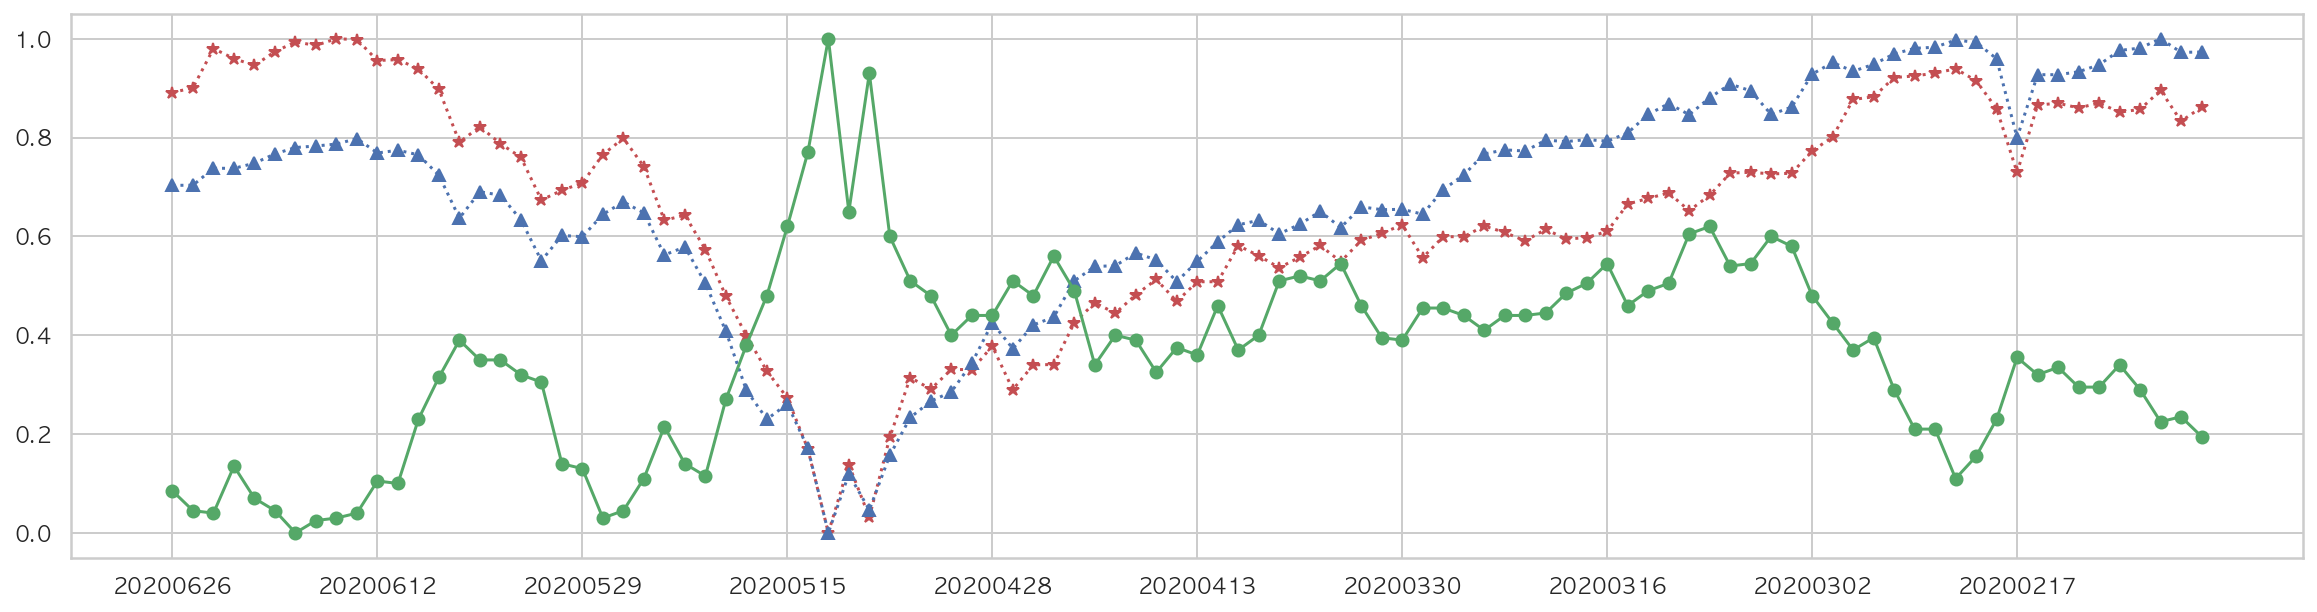

In [11]:
# 그래프 그리기

plt.figure(figsize=(20,5))

data1 = preprocessing.minmax_scale(kospi_df["ncv"][::-1])
data2 = preprocessing.minmax_scale(kosdaq_df["ncv"][::-1])
data3 = preprocessing.minmax_scale(usd_df["nv"][::-1])


plt.plot(kospi_df["dt"], data1, "r*:", label="kospi")
plt.plot(kosdaq_df["dt"], data2, "b^:", label="kosdaq")
plt.plot(usd_df["dt"], data3, "go-", label = "usd")

step = len(kospi_df) // 10
plt.xticks(kospi_df[::step]["dt"][::-1])

plt.show()

In [12]:
np.corrcoef(data1, data2)[0,1]**2, np.corrcoef(data1, data3)[0,1]**2

(0.7419305162969759, 0.5635132946861798)

### HTML

In [13]:
keyword = "삼성전자"
url = "https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query={}".format(keyword)
print(url)

https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query=삼성전자


In [14]:
response = requests.get(url)
response

<Response [200]>

In [40]:
response.text

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="삼성전자 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'삼성전자\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'삼성전자\'의 네이버 통합검색 결과입니다."> <title>삼성전자 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_200528.css"> <link rel="stylesheet" type="text/css" 

In [16]:
from bs4 import BeautifulSoup

In [17]:
dom = BeautifulSoup(response.content, "html.parser")
type(dom)

bs4.BeautifulSoup

In [18]:
selector = "#nx_related_keywords > dl > dd.lst_relate._related_keyword_list > ul>li"
elements = dom.select(selector)

In [19]:
keywords = [element.text.strip() for element in elements]
df = pd.DataFrame({"keyword": keywords})
df

,keyword
0,삼성전자우
1,카카오
2,삼성
3,네이버
4,삼성중공업우
5,셀트리온
6,sk하이닉스
7,코스피
8,삼성전자서비스센터
9,삼성sdi


### xpath

### xpath 문법

- "//*[@id="nx_related_keywords"]/dl/dd[1]/ul/li"

- '//' : 가장 상위 엘리먼트

- '*' : 모든 하위 엘리먼트에서 찾음.

- '[@id="nx_related_keywords"]' : 속성값의 키 : id, 밸류 : nx_rerlated_keywords를 선택

- '/' : 한단계 하위 엘리먼트에서 찾음

- '[]'
    - 속성값으로 엘리먼트 찾기
    - 숫자가 오면 몇 번째 엘리먼트를 의미

In [20]:
import scrapy
from scrapy.http import TextResponse

In [21]:
keyword = "삼성전자"
url = "https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query={}".format(keyword)
response = requests.get(url)

In [30]:
tr_obj = TextResponse(response.url, body=response.text, encoding = "utf-8")
tr_obj

<200 https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90>

In [31]:
selector = '//*[@id="nx_related_keywords"]/dl/dd[1]/ul/li'

In [32]:
datas = tr_obj.xpath(selector)
len(datas)

10

In [33]:
datas[0]

<Selector xpath='//*[@id="nx_related_keywords"]/dl/dd[1]/ul/li' data='<li> <a href="?where=nexearch&amp;que...'>

In [36]:
datas[0].xpath('a/text()').extract()

['삼성전자우']

In [37]:
datas = tr_obj.xpath('//*[@id="nx_related_keywords"]/dl/dd[1]/ul/li/a/text()').extract()

In [38]:
datas

['삼성전자우',
 '카카오',
 '삼성',
 '네이버',
 '삼성중공업우',
 '셀트리온',
 'sk하이닉스',
 '코스피',
 '삼성전자서비스센터',
 '삼성sdi']